#### Laboratorio 9 - Robots para el Mundial de Soccer
Stefano Aragoni, Luis Diego Santos, Carol Arevalo

-----------

Asuma que se le ha encargado crear un programa que se encargue de manejar de forma autónoma a un robot para que juegue en el mundial de soccer Para ello, como primer paso decide utilizar un acercamiento basado en lógica difusa para hacer que el robot se acerque a la pelota. 

Considerando que está en las primeras fases, aún no cuenta con un robot físico por lo cual decide programar una interfaz visual que muestre al robot, la pelota y una portería (véase a la imagen 1 como referencia). Es para esto que debe programar un sistema de lógica difusa que le ayude a su robot simulado a encontrar la pelota y a saber la fuerza con la que debe patear la pelota.

Considere que
- La posición (coordenadas) de la pelota siempre serán conocidas
- La posición (coordenadas) de la portería siempre será conocida
- La posición (coordenadas) del robot siempre podrán ser conocidas
- Debe definir un sistema de lógica difusa para encontrar la pelota
- Debe definir un sistema de lógica difusa para saber la fuerza con la que debe patear la pelota

----------

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygame

pygame 2.1.2 (SDL 2.0.18, Python 3.9.2)
Hello from the pygame community. https://www.pygame.org/contribute.html


##### *Tasks*

1. **Variables crisp para encontrar la pelota**

- Las variables crisp (o variables de entrada) son la distancia entre el robot y la pelota, y el ángulo entre el robot y la pelota. 
    - La distancia puede ir entre 0 a 600 (dimensiones del mapa)
    - El ángulo puede ir entre -90 a 90 grados

2. **Variables lingüísticas para encontrar la pelota**

- Variable lingüística (ENTRADA) - Ángulo entre el robot y la pelota
    - Izquierda
    - Derecha
    - Enfrente


- Variable lingüística (ENTRADA) - Distancia entre el robot y la pelota
    - Cerca
    - Lejos


- Variable lingüística (SALIDA) - Movimiento del robot para encontrar la pelota
    - Moverse hacia adelante
    - Moverse hacia la izquierda
    - Moverse hacia la derecha
    - No moverse

3. **Cláusulas de Horn para encontrar la pelota**

- Si la pelota se encuentra lejos del robot, y la pelota se encuentra a la izquierda del robot, entonces el robot debe moverse hacia la izquierda
- Si la pelota se encuentra lejos del robot, y la pelota se encuentra a la derecha del robot, entonces el robot debe moverse hacia la derecha
- Si la pelota se encuentra lejos del robot, y la pelota se encuentra enfrente del robot, entonces el robot debe moverse hacia adelante

4. **Defuzzificación para encontrar la pelota**

- El método del centroide se utiliza para la defuzzificación. En este caso, el resultado de la defuzzificación es el direccionamiento del robot hacia la pelota. Promedia los valores de las funciones de pertenencia para obtener un valor único.

5. **Variables Crisp para saber la fuerza con la que se debe patear la pelota**
- La variable crisp (o variable de entrada) es la distancia entre el robot y la portería. 
    - La distancia puede ir entre 0 a 600 (dimensiones del mapa). Dependiendo de la distancia, el robot debe patear con más o menos fuerza.

6. **Variables Lingüísticas para saber la fuerza con la que se debe patear la pelota**

- Variable lingüística (ENTRADA) - Distancia entre robot y portería
    - Cerca
    - Media
    - Lejos

- Variable lingüística (SALIDA) - Fuerza con la que se debe patear la pelota
    - Patada suave
    - Patada media
    - Patada fuerte

7. **Cláusulas de Horn para saber la fuerza con la que se debe patear la pelota**

- Si la portería se encuentra cerca del robot, entonces el robot debe patear suave
- Si la portería se encuentra media distancia del robot, entonces el robot debe patear media
- Si la portería se encuentra lejos del robot, entonces el robot debe patear fuerte

8. **Defuzzificación para saber la fuerza con la que se debe patear la pelota**

- Nuevamente, se puede utilizar el método del centroide para la defuzzificación. En este caso, el resultado de la defuzzificación es la fuerza con la que se debe patear la pelota. Indica un valor entre 0 y 1 representando la fuerza con la que se debe patear la pelota, dependiendo de la distancia entre el robot y la portería.


9. **Grafique las funciones de pertenencia para encontrar la pelota**

A través de los gráficos, se puede observar que la distancia entre el robot y la pelota se puede clasificar en 2 categorías: cerca y lejos. Por otro lado, el ángulo entre el robot y la pelota se puede clasificar en 3 categorías: derecha, izquierda, frente. 

Estas graficas representan los rangos de valores que se pueden tomar para cada variable lingüística. Así permitiendo que "cerca" y "lejos" -por ejemplo- sean valores que se puedan tomar en el sistema de lógica difusa.

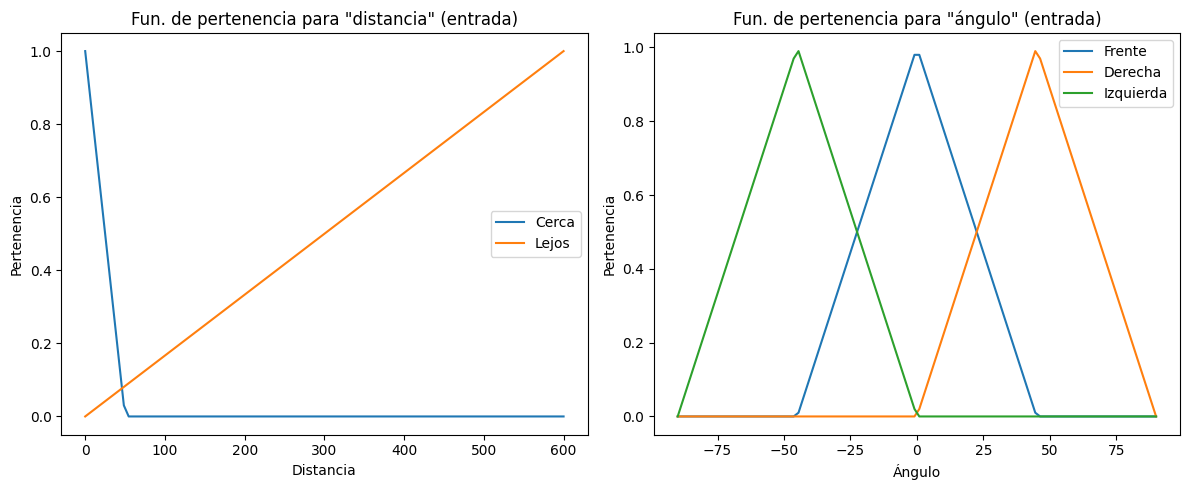

In [2]:
# Definición de las funciones de pertenencia para "distancia"
def pertenencia_distancia_cerca(x):
    return np.maximum(0, 1 - abs(x - 0) / 50)
def pertenencia_distancia_lejos(x):
    return np.maximum(0, 1 - abs(x - 600) / 600)

# Definición de las funciones de pertenencia para "ángulo"
def pertenencia_angulo_frente(x):
    return np.maximum(0, 1 - abs(x - 0) / 45)
def pertenencia_angulo_derecha(x):
    return np.maximum(0, 1 - abs(x - 45) / 45)
def pertenencia_angulo_izquierda(x):
    return np.maximum(0, 1 - abs(x + 45) / 45)

# Valores de entrada
x_distancia = np.linspace(0, 600, 100)
x_angulo = np.linspace(-90, 90, 100)

# Crear subplots lado a lado
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Graficar las funciones de pertenencia para "distancia"
axs[0].plot(x_distancia, pertenencia_distancia_cerca(x_distancia), label='Cerca')
axs[0].plot(x_distancia, pertenencia_distancia_lejos(x_distancia), label='Lejos')
axs[0].set_xlabel('Distancia')
axs[0].set_ylabel('Pertenencia')
axs[0].legend()
axs[0].set_title('Fun. de pertenencia para "distancia" (entrada)')

# Graficar las funciones de pertenencia para "ángulo"
axs[1].plot(x_angulo, pertenencia_angulo_frente(x_angulo), label='Frente')
axs[1].plot(x_angulo, pertenencia_angulo_derecha(x_angulo), label='Derecha')
axs[1].plot(x_angulo, pertenencia_angulo_izquierda(x_angulo), label='Izquierda')
axs[1].set_xlabel('Ángulo')
axs[1].set_ylabel('Pertenencia')
axs[1].legend()
axs[1].set_title('Fun. de pertenencia para "ángulo" (entrada)')

plt.tight_layout()
plt.show()


10. **Grafique las funciones de pertenencia para saber la fuerza con la que se debe patear la pelota**

En el caso de la fuerza con la que se debe patear la pelota, este valor se determinará en base a la distancia entre el robot y la portería. Por tal razón, se definen 3 variables lingüísticas que hacen referencia a la distancia entre el robot y la portería: cerca, media y lejos.

Nuevamente, la gráfica representa los rangos de valores que se pueden tomar para cada variable lingüística. Así permitiendo que "cerca", "media", y "lejos" -por ejemplo- sean valores que se puedan tomar en el sistema de lógica difusa.

Text(0.5, 1.0, 'Funciones de pertenencia para "distancia" (entrada)')

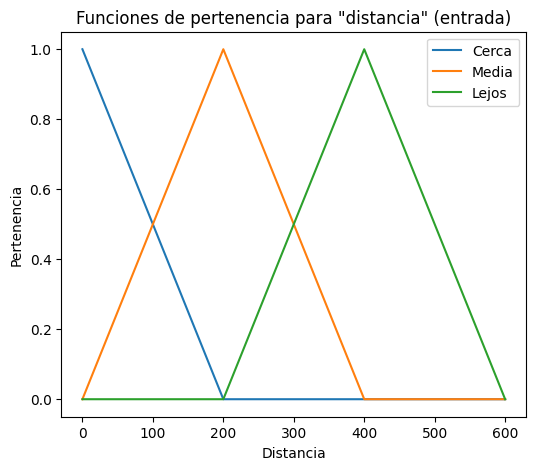

In [3]:
# Definición de las funciones de pertenencia para "distancia"
def pertenencia_distancia_cerca(x):
    return np.maximum(0, 1 - abs(x - 0) / 200)
def pertenencia_distancia_media(x):
    return np.maximum(0, 1 - abs(x - 200) / 200)
def pertenencia_distancia_lejos(x):
    return np.maximum(0, 1 - abs(x - 400) / 200)

# Valores de entrada
x_distancia = np.linspace(0, 600, 100)

# Crear subplot
fig, ax = plt.subplots(figsize=(6, 5))

# Graficar las funciones de pertenencia para "distancia"
ax.plot(x_distancia, pertenencia_distancia_cerca(x_distancia), label='Cerca')
ax.plot(x_distancia, pertenencia_distancia_media(x_distancia), label='Media')
ax.plot(x_distancia, pertenencia_distancia_lejos(x_distancia), label='Lejos')
ax.set_xlabel('Distancia')
ax.set_ylabel('Pertenencia')
ax.legend()
ax.set_title('Funciones de pertenencia para "distancia" (entrada)')



11. **Programe la interfaz gráfica donde se pueda seguir el movimiento del robot y la pelota**

In [4]:
# --------------------------------------------------------------------------
# ----------------------------- INICIALIZACIÓN -----------------------------
# --------------------------------------------------------------------------
from math import inf
import numpy as np
import matplotlib.pyplot as plt
import pygame


# Inicialización de Pygame
pygame.init()

# Dimensiones de la ventana
WIDTH, HEIGHT = 600, 600

# Colores
WHITE = (255, 255, 255)
RED = (255, 0, 0)
GREEN = (0, 128, 0)
BLACK = (0, 0, 0)
BLUE = (0, 0, 255)

# Ventana y reloj
win = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Robot Soccer")
clock = pygame.time.Clock()

# ------------------------------------------------------------------
# ----------------------------- CLASES -----------------------------
# ------------------------------------------------------------------

class Robot:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        self.speed = 1

    def move_towards(self, target_x, target_y):

    # --------- Lógica difusa encontrar la pelota ---------

        # ------- Fuzzy Inputs / Variables Crisp
        dist = np.sqrt((target_x - self.x)**2 + (target_y - self.y)**2)
        angulo = np.arctan2(target_y - self.y, target_x - self.x) * 180 / np.pi
        
        # ------- Funciones de pertenencia / Variables Lingüísticas
        cerca = pertenencia_distancia_cerca(dist)
        lejos = pertenencia_distancia_lejos(dist)

        frente = pertenencia_angulo_frente(angulo)
        derecha = pertenencia_angulo_derecha(angulo)
        izquierda = pertenencia_angulo_izquierda(angulo)
 
        # ------- Operaciones difusas / Aplicar claúsulas de Horn
        probabilidad_distancia = 0 if cerca > 0.8 else 1

        frente_y_lejos = frente * probabilidad_distancia
        derecha_y_lejos = derecha * probabilidad_distancia
        izquierda_y_lejos = izquierda * probabilidad_distancia

        # ------- Deffuzificación 

        # Método del centroide (promedio ponderado)
        numerador = frente_y_lejos * 0 + derecha_y_lejos * 90 + izquierda_y_lejos * (-90)
        denominador = frente_y_lejos + derecha_y_lejos + izquierda_y_lejos

        angulo = numerador / denominador        # Salida Crisp

        #print(f"Distancia: {dist:.2f} | Ángulo: {angulo:.2f}")


    # ------------------------------------------------------

        self.speed = probabilidad_distancia
    
        # Calculamos la dirección en la que se debe mover el robot en base al ángulo
        direction = (np.cos(angulo * np.pi / 180), np.sin(angulo * np.pi / 180))

        # Movemos el robot
        self.x += direction[0] * self.speed
        self.y += direction[1] * self.speed

    def draw(self, win):
        pygame.draw.rect(win, BLACK, (self.x-10, self.y-20, 20, 40))  # Robot representado como un rectángulo

class Ball:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def move_towards(self, target_x, target_y, speed=4):
        direction = (target_x - self.x, target_y - self.y)
        norm = np.sqrt(direction[0]**2 + direction[1]**2)
        
        # Umbral de llegada
        if norm < 10:
            return

        direction = (direction[0] / norm, direction[1] / norm)
        self.x += direction[0] * speed
        self.y += direction[1] * speed

    def draw(self, win):
        pygame.draw.circle(win, WHITE, (int(self.x), int(self.y)), 15)

robot = Robot(100, HEIGHT // 3)
ball = Ball(400, HEIGHT // 2)

def redraw_window():
    # Dibuja el campo de fútbol
    win.fill(GREEN)
    pygame.draw.rect(win, WHITE, (WIDTH-150, HEIGHT//4, 5, HEIGHT//2))
    pygame.draw.circle(win, WHITE, (WIDTH//2, HEIGHT//2), 150, 5)  # Círculo central
    robot.draw(win)
    ball.draw(win)
    pygame.display.update()

def main():
    ball_kicked = False
    run = True
    while run:
        clock.tick(30)  # Limitamos a 30 FPS
        for event in pygame.event.get():
            if event.type == pygame.QUIT:
                run = False
        
        distance_to_ball = np.sqrt((robot.x - ball.x)**2 + (robot.y - ball.y)**2)
        
        # Si el robot está lo suficientemente cerca de la pelota, la pelota se mueve hacia la portería
        if distance_to_ball < 50 and not ball_kicked:
            ball_kicked = True
        
        if ball_kicked:
            ball.move_towards(WIDTH-150, HEIGHT//2)
        else:
            robot.move_towards(ball.x, ball.y)
        
        redraw_window()

    pygame.quit()

if __name__ == "__main__":
    main()


: 